In [1]:
!pip install ultralytics opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.6 MB/s eta 0:00:00


In [2]:
import pandas as pd

# jika sudah upload manual
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

print("Dataset Loaded!")
print(df.head())

print("\nJumlah Baris:", len(df))
print("\nJumlah Kolom:", df.shape[1])
print("\nInfo Data:")
print(df.info())

Dataset Loaded!
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Jumlah Baris: 5110

Jumlah Kolom: 12

I

In [3]:
print("\nDistribusi Stroke:")
print(df['stroke'].value_counts())

print("\nPersentase Stroke:")
print(df['stroke'].value_counts(normalize=True) * 100)


Distribusi Stroke:
stroke
0    4861
1     249
Name: count, dtype: int64

Persentase Stroke:
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


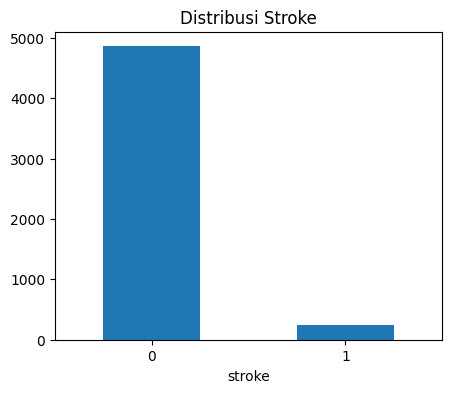

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
df['stroke'].value_counts().plot(kind='bar')
plt.title('Distribusi Stroke')
plt.xticks(rotation=0)
plt.show()

In [5]:
corr = df[['age','avg_glucose_level','bmi','stroke']].corr()
print(corr)

                        age  avg_glucose_level       bmi    stroke
age                1.000000           0.238171  0.333398  0.245257
avg_glucose_level  0.238171           1.000000  0.175502  0.131945
bmi                0.333398           0.175502  1.000000  0.042374
stroke             0.245257           0.131945  0.042374  1.000000


In [6]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import display, Javascript, HTML
from PIL import Image
import base64
import time
import io

# Pilih model ringan untuk inference cepat
model = YOLO('yolov8n-pose.pt')
print("Model YOLOv8 Pose telah dimuat.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Model YOLOv8 Pose telah dimuat.


In [7]:
def display_image(image):
    _, encoded_image = cv2.imencode('.jpg', image)
    display(Image(data=encoded_image.tobytes()))

Saving pose normal.jpg to pose normal.jpg
Saving Stroke-scaled.jpg to Stroke-scaled.jpg

0: 640x448 1 person, 105.5ms
Speed: 12.6ms preprocess, 105.5ms inference, 48.8ms postprocess per image at shape (1, 3, 640, 448)


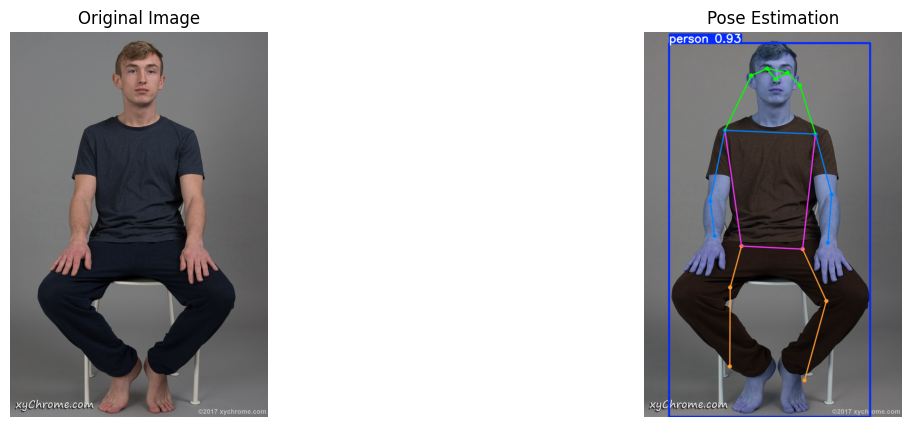


Keypoints untuk pose normal.jpg:
Person 1:
  nose: (348.9, 125.1) - conf: 1.00
  left_eye: (380.7, 109.0) - conf: 0.98
  right_eye: (326.4, 97.1) - conf: 1.00
  left_ear: (413.5, 142.3) - conf: 0.71
  right_ear: (284.7, 115.4) - conf: 0.96
  left_shoulder: (454.6, 271.1) - conf: 1.00
  right_shoulder: (215.0, 261.8) - conf: 1.00
  left_elbow: (497.6, 432.9) - conf: 0.97
  right_elbow: (175.3, 449.6) - conf: 1.00
  left_wrist: (487.1, 560.1) - conf: 0.96
  right_wrist: (187.9, 542.5) - conf: 1.00
  left_hip: (420.3, 577.1) - conf: 1.00
  right_hip: (258.8, 569.8) - conf: 1.00
  left_knee: (483.6, 715.7) - conf: 1.00
  right_knee: (228.6, 679.1) - conf: 1.00
  left_ankle: (425.5, 926.9) - conf: 0.98
  right_ankle: (227.3, 889.3) - conf: 0.99

0: 448x640 1 person, 75.9ms
Speed: 5.9ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


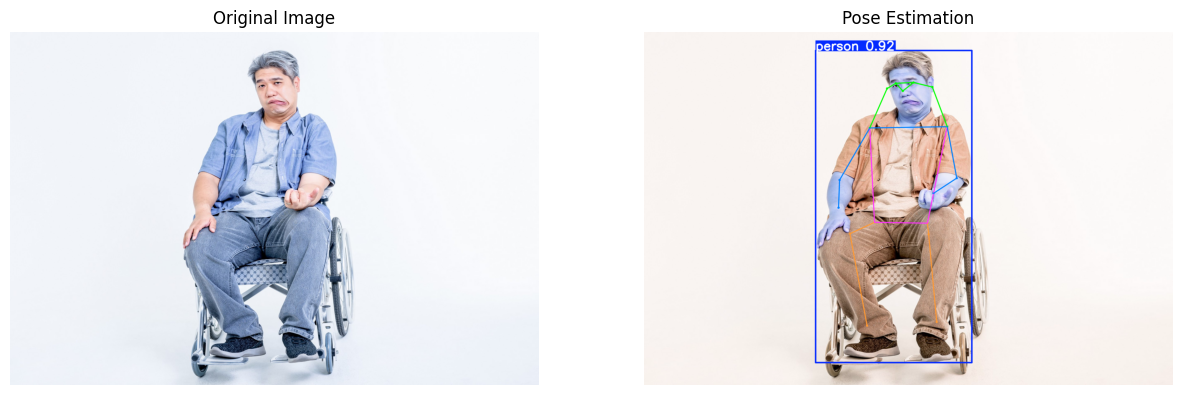


Keypoints untuk Stroke-scaled.jpg:
Person 1:
  nose: (1252.9, 285.6) - conf: 0.99
  left_eye: (1304.8, 244.4) - conf: 0.98
  right_eye: (1219.0, 248.6) - conf: 0.98
  left_ear: (1395.8, 266.7) - conf: 0.82
  right_ear: (1176.5, 273.9) - conf: 0.79
  left_shoulder: (1467.6, 458.5) - conf: 0.99
  right_shoulder: (1092.8, 464.0) - conf: 1.00
  left_elbow: (1513.8, 707.6) - conf: 0.95
  right_elbow: (946.6, 716.8) - conf: 0.99
  left_wrist: (1400.2, 781.3) - conf: 0.95
  right_wrist: (941.1, 850.3) - conf: 0.98
  left_hip: (1371.5, 925.1) - conf: 1.00
  right_hip: (1116.0, 921.3) - conf: 1.00
  left_knee: (1377.3, 979.2) - conf: 0.99
  right_knee: (996.2, 976.4) - conf: 1.00
  left_ankle: (1416.5, 1403.9) - conf: 0.98
  right_ankle: (1080.0, 1421.0) - conf: 0.98


In [8]:
from google.colab import files

uploaded = files.upload()

keypoint_names = [
    "nose", "left_eye", "right_eye", "left_ear", "right_ear",
    "left_shoulder", "right_shoulder", "left_elbow", "right_elbow",
    "left_wrist", "right_wrist", "left_hip", "right_hip",
    "left_knee", "right_knee", "left_ankle", "right_ankle"
]

for filename in uploaded.keys():
    image_bytes = uploaded[filename]
    image = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = model(image_rgb)
    result_image = results[0].plot()
    result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.imshow(image_rgb)
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(result_rgb)
    ax2.set_title('Pose Estimation')
    ax2.axis('off')
    plt.show()

    print(f"\nKeypoints untuk {filename}:")
    for res in results:
        if res.keypoints is not None:
            keypoints = res.keypoints.xy.cpu().numpy()
            conf = res.keypoints.conf.cpu().numpy()

            for person_idx, (kp, cf) in enumerate(zip(keypoints, conf)):
                print(f"Person {person_idx + 1}:")
                for k_idx, ((x, y), c) in enumerate(zip(kp, cf)):
                    if c > 0.5:
                        print(f"  {keypoint_names[k_idx]}: ({x:.1f}, {y:.1f}) - conf: {c:.2f}")

In [9]:
import numpy as np

def angle(a, b, c):
    """Hitung sudut siku menggunakan 3 titik"""
    ba = a - b
    bc = c - b
    cosine = np.dot(ba, bc) / (np.linalg.norm(ba)*np.linalg.norm(bc))
    return np.degrees(np.arccos(np.clip(cosine, -1.0, 1.0)))

In [10]:
def analyze_pose(keypoints):
    kp = keypoints

    # koordinat penting
    ls, rs = kp[5], kp[6]       # shoulder
    le, re = kp[7], kp[8]       # elbow
    lw, rw = kp[9], kp[10]      # wrist

    # hitung sudut siku kiri & kanan
    ang_left = angle(ls, le, lw)
    ang_right = angle(rs, re, rw)

    # beda sudut
    diff = abs(ang_left - ang_right)

    # shoulder drop
    shoulder_drop = abs(ls[1] - rs[1])

    result = "NORMAL"
    reason = []

    if diff > 25:
        result = "KEMUNGKINAN STROKE"
        reason.append("Asimetri sudut siku > 25°")

    if shoulder_drop > 30:
        result = "KEMUNGKINAN STROKE"
        reason.append("Shoulder drop > 30px")

    return result, ang_left, ang_right, shoulder_drop, reason

In [11]:
stroke_analysis = {}

for filename in uploaded.keys():
    results = model(cv2.cvtColor(cv2.imdecode(
        np.frombuffer(uploaded[filename], np.uint8),
        cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))

    for res in results:
        if res.keypoints is not None:
            kp = res.keypoints.xy.cpu().numpy()[0]
            status, angL, angR, drop, reason = analyze_pose(kp)

            stroke_analysis[filename] = {
                "status": status,
                "sudut_kiri": angL,
                "sudut_kanan": angR,
                "shoulder_drop": drop,
                "reason": reason
            }


0: 640x448 1 person, 7.9ms
Speed: 2.8ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)

0: 448x640 1 person, 7.7ms
Speed: 2.9ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


In [12]:
print("\n===== HASIL PERBANDINGAN =====\n")
for file, data in stroke_analysis.items():
    print(f"File: {file}")
    print(f"Status            : {data['status']}")
    print(f"Sudut kiri        : {data['sudut_kiri']:.1f}°")
    print(f"Sudut kanan       : {data['sudut_kanan']:.1f}°")
    print(f"Shoulder drop     : {data['shoulder_drop']:.1f}px")

    if data['reason']:
        print("Indikasi          :")
        for r in data['reason']:
            print(f" - {r}")
    else:
        print("Indikasi          : Tidak ada")
    print("--------------------------------")


===== HASIL PERBANDINGAN =====

File: pose normal.jpg
Status            : NORMAL
Sudut kiri        : 160.4°
Sudut kanan       : 160.4°
Shoulder drop     : 9.3px
Indikasi          : Tidak ada
--------------------------------
File: Stroke-scaled.jpg
Status            : KEMUNGKINAN STROKE
Sudut kiri        : 112.5°
Sudut kanan       : 152.3°
Shoulder drop     : 5.5px
Indikasi          :
 - Asimetri sudut siku > 25°
--------------------------------
